In [732]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [733]:
leads = pd.read_csv(r"C:\Users\LENOVO\Downloads\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [734]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [735]:
ol

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681
...,...
9235,579564
9236,579546
9237,579545
9238,579538


In [736]:
leads.shape

(9240, 37)

In [737]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [738]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [739]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# Data cleaning

In [740]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


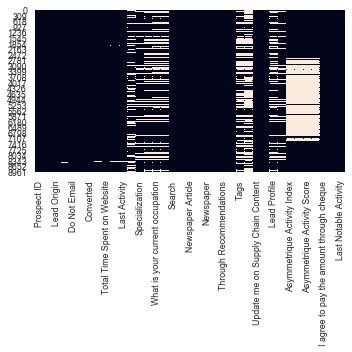

In [741]:
plt.figure(figsize=(5,5))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [742]:
#calculating missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [743]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [744]:
#Dropping Asymmetric activity score and assymetric profile score 
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 35)

In [745]:
#Removing columns which have only one unique value  
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 30)

In [746]:
# Deleting the column 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
leads.shape

(9240, 29)

In [747]:
#dropping 'what matters the most to you in choosing a course'
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [748]:
#checking for null values in lead source
leads['Lead Source'].isnull().sum()

36

In [749]:
#dropping 'how did you hear about X education'
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

In [750]:
# removing rows from lead source which have null values because the column is important
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 27)

In [751]:
leads['Lead Source'].isnull().sum()

0

In [752]:
#Imputing some columns with meadian because of high outliers
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

In [753]:
#Checking spread of data amongst different categories in lead quality
leads['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [754]:
#checking null values in lead quality
leads['Lead Quality'].isnull().sum()

4753

In [755]:
#replacing all null values as unknown in lead quality
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

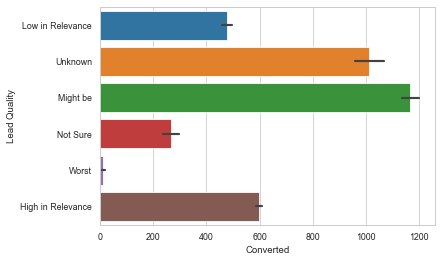

In [756]:
#visualising lead quality
sns.barplot(y='Lead Quality', x='Converted', data=leads, estimator=np.sum)

In [757]:
#checking values in asymmetric profile index
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

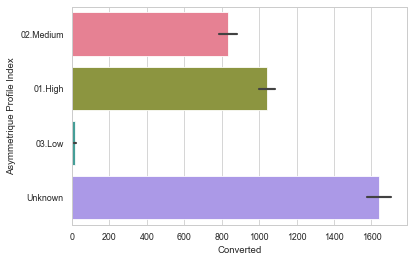

In [758]:
#Null values being replaced with unknown 
leads['Asymmetrique Profile Index'].isnull().sum()
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [759]:
#checking values in asymmetric profile index
leads['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [760]:
#checking values in asymmetric activity index
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [761]:
#null values in asymmetric activity index
leads['Asymmetrique Activity Index'].isnull().sum()

4201

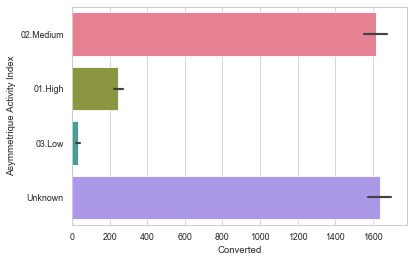

In [762]:
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)



sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [763]:
leads['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [764]:
l=['What is your current occupation','Lead Profile','City','Specialization','Tags']

In [765]:
for i in l:
      
    leads[i].fillna("Unknown", inplace = True)



#sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads, estimator=np.sum)


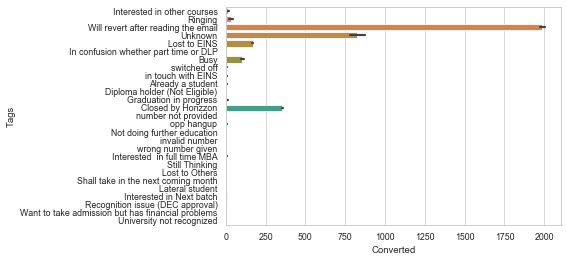

In [766]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads, estimator=np.sum)

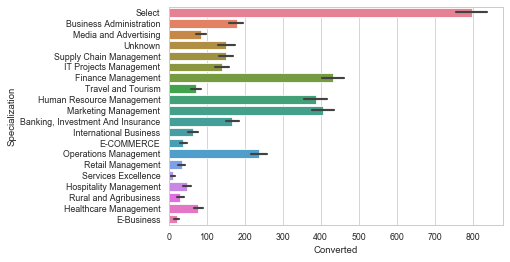

In [767]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)


In [768]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Country,2426,26.36
Last Activity,101,1.10
Last Notable Activity,0,0.00
What is your current occupation,0,0.00
Lead Origin,0,0.00
Lead Source,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,0,0.00


In [769]:
#calculating missing values again
leads.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              101
Country                                   2426
Specialization                               0
What is your current occupation              0
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Tags                                         0
Lead Quality                                 0
Lead Profile 

In [770]:
leads['Lead Origin'].astype('category').value_counts()

Landing Page Submission    4885
API                        3580
Lead Add Form               685
Lead Import                  54
Name: Lead Origin, dtype: int64

In [771]:
leads['Lead Source'].astype('category').value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [772]:
leads['Do Not Email'].astype('category').value_counts()

No     8483
Yes     721
Name: Do Not Email, dtype: int64

In [773]:
leads['Do Not Call'].astype('category').value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

In [774]:
leads['Converted'].astype('category').value_counts()

0    5672
1    3532
Name: Converted, dtype: int64

In [775]:
leads['Last Activity'].astype('category').value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [776]:
leads['Search'].astype('category').value_counts()

No     9190
Yes      14
Name: Search, dtype: int64

In [777]:
leads['Newspaper Article'].astype('category').value_counts()

No     9202
Yes       2
Name: Newspaper Article, dtype: int64

In [778]:
leads['X Education Forums'].astype('category').value_counts()

No     9203
Yes       1
Name: X Education Forums, dtype: int64

In [779]:
leads['Newspaper'].astype('category').value_counts()

No     9203
Yes       1
Name: Newspaper, dtype: int64

In [780]:
leads['Digital Advertisement'].astype('category').value_counts()

No     9200
Yes       4
Name: Digital Advertisement, dtype: int64

In [781]:
leads['Through Recommendations'].astype('category').value_counts()

No     9197
Yes       7
Name: Through Recommendations, dtype: int64

In [782]:
leads['A free copy of Mastering The Interview'].astype('category').value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [783]:
leads['Last Notable Activity'].astype('category').value_counts()

Modified                        3397
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [784]:
#Dropping all columns which have skewed values
leads.drop(['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations','Tags'], axis = 1, inplace = True)

In [785]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Unemployed,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,India,Select,Unemployed,Unknown,Select,Select,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,India,Select,Unemployed,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


Creating new columns to deal with skewedness of values

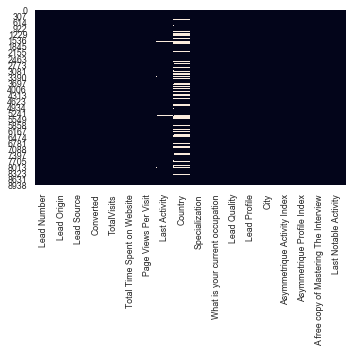

In [786]:
plt.figure(figsize=(5,5))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

Dealing with outliers

In [787]:
# Checking outliers at different values
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.00,617194.61,23418.83,579533.00,596484.50,615479.00,637409.25,650513.10,655405.85,659599.46,660737.00
Converted,9204.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
TotalVisits,9204.00,3.45,4.82,0.00,1.00,3.00,5.00,7.00,10.00,17.00,251.00
Total Time Spent on Website,9204.00,489.01,547.98,0.00,14.00,250.00,938.00,1380.00,1562.00,1839.97,2272.00
Page Views Per Visit,9204.00,2.36,2.15,0.00,1.00,2.00,3.00,5.00,6.00,9.00,55.00


In [788]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


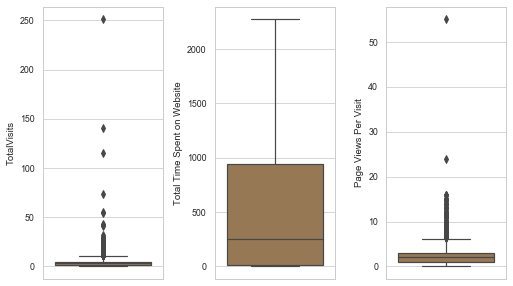

In [789]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [790]:
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8575, 18)

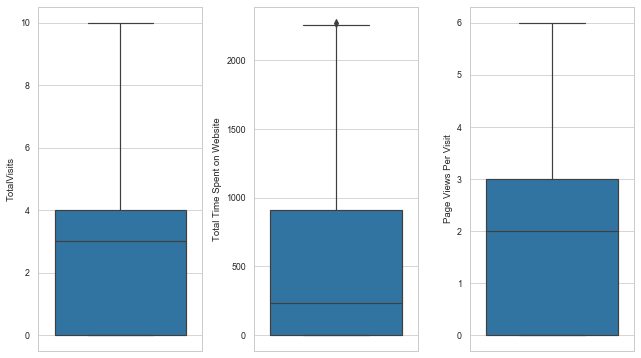

In [791]:
#distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var, data=leads)
    
    plt.tight_layout()
    plt.show()
    
boxplot(numeric_variables)

In [792]:
leads.shape

(8575, 18)

In [793]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Unemployed,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,India,Select,Unemployed,Unknown,Select,Select,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,India,Select,Unemployed,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


In [794]:
#dropping variables that do not help in predicting
leads = leads.drop('City', axis=1)

leads = leads.drop('Country', axis=1)

In [795]:
#converting binary variables yes and no to 0 and 1
varlist =  ['A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,Low in Relevance,Select,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,Unknown,Select,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Might be,Potential Lead,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Not Sure,Select,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,Might be,Select,02.Medium,01.High,0,Modified


In [796]:
#Checking missing values again
leads.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                             101
Specialization                              0
What is your current occupation             0
Lead Quality                                0
Lead Profile                                0
Asymmetrique Activity Index                 0
Asymmetrique Profile Index                  0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

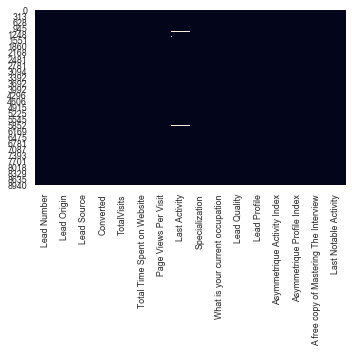

In [797]:
plt.figure(figsize=(5,5))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [798]:
#checking for missing values
leads.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                             101
Specialization                              0
What is your current occupation             0
Lead Quality                                0
Lead Profile                                0
Asymmetrique Activity Index                 0
Asymmetrique Profile Index                  0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [799]:
#dropping rows which have null values in columun 'Last activity'
leads = leads[~pd.isnull(leads['Last Activity'])]

In [800]:
#checking for missing values
leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Lead Quality                              0
Lead Profile                              0
Asymmetrique Activity Index               0
Asymmetrique Profile Index                0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [801]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,Low in Relevance,Select,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,Unemployed,Unknown,Select,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Might be,Potential Lead,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Not Sure,Select,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,Might be,Select,02.Medium,01.High,0,Modified


All the null values ahve been dealt with

In [802]:
#percentage of rows that are retained
print(len(leads.index))
print(len(leads.index)/9240)

8474
0.9170995670995671


91% percent of the values are retained

## Creating dummy variables

In [803]:
#columns which are object types
obj = leads.loc[:, leads.dtypes == 'object']
obj.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Last Notable Activity'],
      dtype='object')

In [804]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
        'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(8474, 70)

In [805]:
# Creating dummy variables and dropping the'Unknown' column which has null values.

#dummy variables for variable 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)

#dummy variables for variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)

# dummy variables for variable'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)



#dummy variables for variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)

#dummy variables for variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)

#dummy variables for variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
ml1 = ml.drop(['Specialization_Unknown'], 1)
leads = pd.concat([leads,ml1], axis=1)


leads.shape

(8474, 112)

In [806]:
# Dropping variables which have dummies created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Lead Quality',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Last Notable Activity'], 1)

leads.shape

(8474, 102)

In [807]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660727,1,2.00,1532,2.00,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.00,305,1.00,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.00,1428,1.00,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Scaling

In [808]:
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [809]:
#Splitting into 70% train data and 30% test data
df_train, df_test = train_test_split(leads, train_size=0.7, test_size=0.3, random_state=100)

In [810]:
scaler = StandardScaler()
varlist = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_train[varlist] = scaler.fit_transform(df_train[varlist])
df_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4323,618361,0,1.38,-0.33,0.57,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5795,605303,1,-1.18,-0.86,-1.25,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
434,655694,0,0.10,0.29,0.57,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8957,581655,0,-0.32,-0.52,-0.04,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4260,619066,0,-0.75,-0.86,-0.65,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [811]:
# Split the train dataset into X and y
from sklearn.model_selection import train_test_split
X = leads.drop(['Converted'], axis=1)

X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660727,2.00,1532,2.00,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.00,305,1.00,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.00,1428,1.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [812]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [814]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4323,618361,1.38,-0.33,0.57,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5795,605303,-1.18,-0.86,-1.25,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
434,655694,0.10,0.29,0.57,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8957,581655,-0.32,-0.52,-0.04,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4260,619066,-0.75,-0.86,-0.65,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Building model

In [815]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5840
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1862.4
Date:                Mon, 20 Apr 2020   Deviance:                       3724.8
Time:                        20:31:37   Pearson chi2:                 5.95e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   12.7959   1.88e+05    6.8e-05      1.000   -3.69e+05    3.69e+05
Lead Number                                           9.115e-06   2.01e-06      4.530      0.000    5.17e-06    1.31e-05
TotalVisits                                              0.2278      0.067      3.397      0.001       0.096       0.359
Total Time Spent on Website                              1.0655      0.049     21.819      0.000       0.970       1.161
Page Views Per Visit                                    -0.2692      0.076     -3.562      0.000      -0.417      -0.121
A free copy of Mastering The Interview                   0.1645      0.137      1.204      0.228      -0.103       0.432
Lead Origin_Landing Page Submission                     -0.3408      0.191     -1.782      0.075      -0.716       0.034
Lead Origin_Lead Add Form                                1.5482   1.35e+05   1.15e-05      1.000   -2.65e+05    2.65e+05
Lead Origin_Lead Import                                 25.1842   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                               2.1464   1.35e+05   1.59e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Facebook                                   -23.4302   1.88e+05     -0.000      1.000   -3.69e+05    3.69e+05
Lead Source_Google                                       2.4623   1.35e+05   1.82e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Live Chat                                   25.6083   8.49e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Source_NC_EDM                                      27.0874   1.74e+05      0.000      1.000   -3.41e+05    3.41e+05
Lead Source_Olark Chat                                   3.5347   1.35e+05   2.62e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Organic Search                               2.2888   1.35e+05   1.69e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Pay per Click Ads                         2.715e-09    7.7e-05   3.53e-05      1.000      -0.000       0.000
Lead Source_Press_Release                            -2.833e-09   3.83e-05  -7.41e-05      1.000    -7.5e-05     7.5e-05
Lead Source_Reference                                    2.7065      1.465      1.848      0.065      -0.164       5.577
Lead Source_Referral Sites                               1.7907   1.35e+05   1.32e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Social Media                                27.1317    1.9e+05      0.000      1.000   -3.72e+05    3.72e+05
Lead Source_WeLearn                                     24.0817   1.83e+05      0.000      1.000   -3.59e+05    3.59e+05
Lead Source_Welingak Website                             6

In [816]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5840
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1862.4
Date:                Mon, 20 Apr 2020   Deviance:                       3724.8
Time:                        20:31:38   Pearson chi2:                 5.95e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   12.7959   1.88e+05    6.8e-05      1.000   -3.69e+05    3.69e+05
Lead Number                                           9.115e-06   2.01e-06      4.530      0.000    5.17e-06    1.31e-05
TotalVisits                                              0.2278      0.067      3.397      0.001       0.096       0.359
Total Time Spent on Website                              1.0655      0.049     21.819      0.000       0.970       1.161
Page Views Per Visit                                    -0.2692      0.076     -3.562      0.000      -0.417      -0.121
A free copy of Mastering The Interview                   0.1645      0.137      1.204      0.228      -0.103       0.432
Lead Origin_Landing Page Submission                     -0.3408      0.191     -1.782      0.075      -0.716       0.034
Lead Origin_Lead Add Form                                1.5482   1.35e+05   1.15e-05      1.000   -2.65e+05    2.65e+05
Lead Origin_Lead Import                                 25.1842   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                               2.1464   1.35e+05   1.59e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Facebook                                   -23.4302   1.88e+05     -0.000      1.000   -3.69e+05    3.69e+05
Lead Source_Google                                       2.4623   1.35e+05   1.82e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Live Chat                                   25.6083   8.49e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Source_NC_EDM                                      27.0874   1.74e+05      0.000      1.000   -3.41e+05    3.41e+05
Lead Source_Olark Chat                                   3.5347   1.35e+05   2.62e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Organic Search                               2.2888   1.35e+05   1.69e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Pay per Click Ads                         2.715e-09    7.7e-05   3.53e-05      1.000      -0.000       0.000
Lead Source_Press_Release                            -2.833e-09   3.83e-05  -7.41e-05      1.000    -7.5e-05     7.5e-05
Lead Source_Reference                                    2.7065      1.465      1.848      0.065      -0.164       5.577
Lead Source_Referral Sites                               1.7907   1.35e+05   1.32e-05      1.000   -2.65e+05    2.65e+05
Lead Source_Social Media                                27.1317    1.9e+05      0.000      1.000   -3.72e+05    3.72e+05
Lead Source_WeLearn                                     24.0817   1.83e+05      0.000      1.000   -3.59e+05    3.59e+05
Lead Source_Welingak Website                             6

In [817]:
# Import RFE and select 15 variables
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [818]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [819]:
#Features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 61),
 ('Lead Source_NC_EDM', False, 72),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 84),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 68),
 ('Lead Source_WeLearn', False, 69),
 ('Lead Source_Welingak Website', False, 19),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 77),
 ('Lead Source_google', False, 65),
 (

In [820]:
col = X_train.columns[rfe.support_]

In [821]:
col


Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Lead Quality_High in Relevance', 'Lead Quality_Might be',
       'Asymmetrique Profile Index_02.Medium', 'Lead Profile_Potential Lead',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [822]:
X_train = X_train[col]

In [823]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res0 = logm2.fit()
res0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2143.2
Date:                Mon, 20 Apr 2020   Deviance:                       4286.4
Time:                        20:31:40   Pearson chi2:                 8.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7522      1.110     -6.981      0.000      -9.929      -5.576
Lead Number                                           9.797e-06   1.77e-06      5.548      0.000    6.34e-06    1.33e-05
Total Time Spent on Website                              1.0842      0.045     24.277      0.000       0.997       1.172
Lead Origin_Landing Page Submission                     -0.2378      0.117     -2.031      0.042      -0.467      -0.008
Lead Origin_Lead Add Form                                3.5414      0.239     14.840      0.000       3.074       4.009
Lead Source_Direct Traffic                              -0.2759      0.104     -2.653      0.008      -0.480      -0.072
Lead Source_Olark Chat                                   1.2772      0.134      9.560      0.000       1.015       1.539
Last Activity_Olark Chat Conversation                   -1.2452      0.192     -6.498      0.000      -1.621      -0.870
Last Activity_SMS Sent                                   0.9085      0.173      5.255      0.000       0.570       1.247
Last Notable Activity_Modified                          -0.8389      0.107     -7.873      0.000      -1.048      -0.630
Last Notable Activity_SMS Sent                           0.5018      0.196      2.559      0.010       0.118       0.886
Lead Quality_High in Relevance                           2.8793      0.259     11.101      0.000       2.371       3.388
Lead Quality_Might be                                    1.3421      0.108     12.483      0.000       1.131       1.553
Asymmetrique Profile Index_02.Medium                     0.1612      0.093      1.727      0.084      -0.022       0.344
Lead Profile_Potential Lead                              1.4854      0.118     12.591      0.000       1.254       1.717
What is your current occupation_Working Professional     2.1016      0.216      9.738      0.000       1.679       2.525
========================================================================================================================
"""

In [824]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [825]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,8.68
9,Last Notable Activity_SMS Sent,6.39
7,Last Activity_SMS Sent,6.16
2,Lead Origin_Landing Page Submission,5.00
5,Lead Source_Olark Chat,2.49
8,Last Notable Activity_Modified,2.40
4,Lead Source_Direct Traffic,1.98
12,Asymmetrique Profile Index_02.Medium,1.81
3,Lead Origin_Lead Add Form,1.74
13,Lead Profile_Potential Lead,1.66


VIF and p values both are very low so we can consider this model

## Sensitivity and Specificity tradeoff

In [826]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.29,4323
1,1,1.00,5795
2,0,0.30,434
3,0,0.61,8957
4,0,0.02,4260


In [827]:
y_train_pred = res0.predict(sm.add_constant(X_train))
y_train_pred[:10]

4323   0.29
5795   1.00
434    0.30
8957   0.61
4260   0.02
3759   0.44
1364   0.44
3825   0.99
7559   0.57
1902   0.16
dtype: float64

In [828]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.294454  , 0.99919624, 0.29989027, 0.60773349, 0.01854067,
       0.44377085, 0.43905091, 0.98889438, 0.56544347, 0.1557751 ])

In [829]:
# Creating new dataframe with actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.29
1,1,1.00
2,0,0.30
3,0,0.61
4,0,0.02


In [830]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.29,4323
1,1,1.00,5795
2,0,0.30,434
3,0,0.61,8957
4,0,0.02,4260


In [831]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.29,4323,0
1,1,1.00,5795,1
2,0,0.30,434,0
3,0,0.61,8957,1
4,0,0.02,4260,0


In [832]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3341  351]
 [ 586 1653]]


In [833]:
#overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8420165233518799


In [834]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [835]:
#Sensitivity
TP/(TP+FN)

0.7382760160786065

In [836]:
#Specificity
TN/(TN+FP)

0.9049295774647887

### Plotting ROC for finding optimal value and checking the accuracy of the graph

In [837]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [838]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

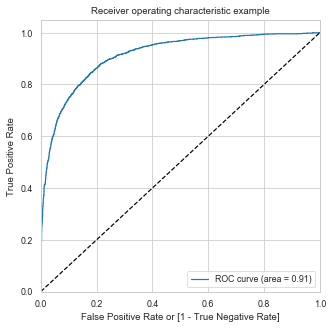

In [839]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [840]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [841]:
auc = auc_val(fpr,tpr)
auc

0.9129715421051803

In [842]:
#columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.29,4323,0,1,1,1,0,0,0,0,0,0,0
1,1,1.00,5795,1,1,1,1,1,1,1,1,1,1,1
2,0,0.30,434,0,1,1,1,0,0,0,0,0,0,0
3,0,0.61,8957,1,1,1,1,1,1,1,1,0,0,0
4,0,0.02,4260,0,1,0,0,0,0,0,0,0,0,0


In [843]:
#calculating accuracy sensitivity and specificity for different probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.69   0.97   0.52
0.20  0.20      0.80   0.91   0.73
0.30  0.30      0.83   0.85   0.82
0.40  0.40      0.84   0.80   0.86
0.50  0.50      0.84   0.74   0.90
0.60  0.60      0.84   0.67   0.94
0.70  0.70      0.82   0.59   0.96
0.80  0.80      0.80   0.50   0.97
0.90  0.90      0.76   0.38   0.99


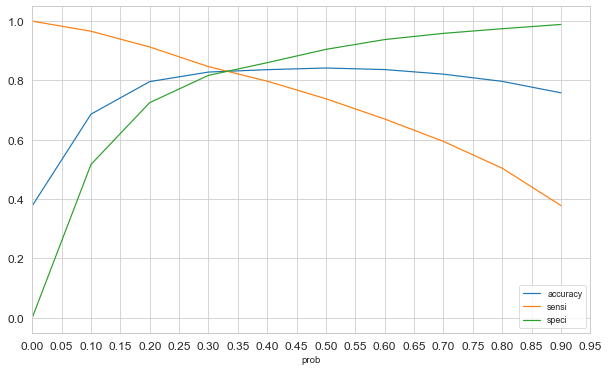

In [844]:
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

### As we can see the optimal cutoff value is around 0.33

Predicting on train set

In [845]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.29,4323,0,1,1,1,0,0,0,0,0,0,0,0
1,1,1.00,5795,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.30,434,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.61,8957,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.02,4260,0,1,0,0,0,0,0,0,0,0,0,0


In [846]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8315629742033384

In [847]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3071,  621],
       [ 378, 1861]], dtype=int64)

In [848]:
# Other matrices

TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [849]:
# Sensitivity
TP / float(TP+FN)

0.8311746315319339

In [850]:
#Specificity
TN / float(TN+FP)

0.831798483206934

Predicting on test set

In [851]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [852]:
X_test = df_test

In [853]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7710,590690,0,-1.68,-0.86,-2.01,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7124,594837,0,-1.31,-0.86,-1.28,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6405,600810,0,-1.13,-0.86,-0.91,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
356,656644,1,-0.77,-0.86,-1.09,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9081,580734,0,-1.31,-0.86,-1.28,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [854]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [855]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Might be,Asymmetrique Profile Index_02.Medium,Lead Profile_Potential Lead,What is your current occupation_Working Professional
7710,590690,-1.78,0,0,0,1,0,1,0,1,0,0,1,0,0
7124,594837,-1.78,1,0,1,0,0,0,0,0,0,0,1,0,0
6405,600810,-1.78,0,0,0,0,0,0,0,0,0,0,0,0,0
356,656644,-1.77,1,0,0,0,0,0,0,0,0,1,1,0,1
9081,580734,-1.78,1,0,0,0,0,0,1,0,0,0,0,1,0


In [856]:

X_test_sm = sm.add_constant(X_test)

In [857]:
#making predictions on test set

y_test_pred = res0.predict(X_test_sm)

In [858]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7710,0.26
7124,0.01
6405,0.02
356,0.53
9081,0.03


In [859]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [860]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [861]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.26
1,0,0.01
2,0,0.02
3,1,0.53
4,0,0.03


In [862]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.26
1,0,0.01
2,0,0.02
3,1,0.53
4,0,0.03


In [863]:
# Make predictions on the test set using 0.33 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.26,0
1,0,0.01,0
2,0,0.02,0
3,1,0.53,1
4,0,0.03,0


In [864]:
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Conversion_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.29,0,4323,0,29
1,1.00,1,5795,1,100
2,0.30,0,434,0,30
3,0.61,0,8957,1,61
4,0.02,0,4260,0,2


In [865]:
# overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7774282343688557

In [866]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1564,   36],
       [ 530,  413]], dtype=int64)

In [867]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [868]:
# sensitivity
TP / float(TP+FN)

0.43796394485683987

In [869]:
# specificity
TN / float(TN+FP)

0.9775

## Precision and Recall tradeoff

Train set prediction

In [870]:
from sklearn.metrics import precision_score, recall_score

In [871]:
#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.749798549556809

In [872]:
#recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8311746315319339

In [873]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 5926    0
 5927    0
 5928    1
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 5926    0
 5927    0
 5928    1
 5929    0
 5930    0
 Name: final_predicted, Length: 5931, dtype: int64)

In [874]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

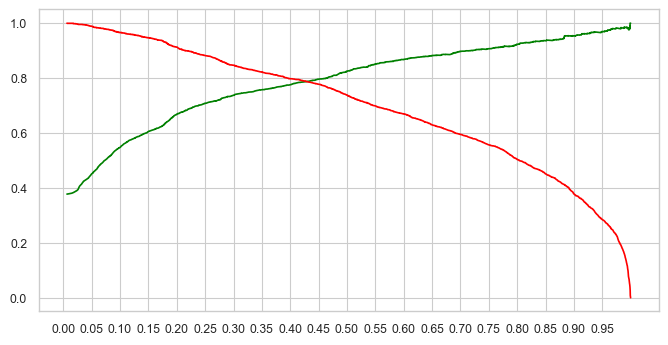

In [875]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

Here we get the cutoff at around 0.41 but we will stick to 0.33 cutoff that we got in the previous model as it gives high accuracy

In [876]:
#Accuracy of train set
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8315629742033384

Test set predictions

In [877]:
y_test_pred = res0.predict(sm.add_constant(X_test))

In [878]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [879]:
y_test_df = pd.DataFrame(y_test)

In [880]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [881]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [882]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [883]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [884]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,7710,0.26
1,0,7124,0.01
2,0,6405,0.02
3,1,356,0.53
4,0,9081,0.03


In [885]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [886]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,7710,0.26,0
1,0,7124,0.01,0
2,0,6405,0.02,0
3,1,356,0.53,1
4,0,9081,0.03,0


In [887]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7774282343688557

In [888]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1564,   36],
       [ 530,  413]], dtype=int64)

In [889]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [890]:
#Precision
TP/(TP+FP)

0.9198218262806236

In [891]:
#Recall
TP/(TP+FN)

0.43796394485683987

# Determining Feature Importance

In [892]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res0.params[1:]
new_params

Lead Number                                             0.00
Total Time Spent on Website                             1.08
Lead Origin_Landing Page Submission                    -0.24
Lead Origin_Lead Add Form                               3.54
Lead Source_Direct Traffic                             -0.28
Lead Source_Olark Chat                                  1.28
Last Activity_Olark Chat Conversation                  -1.25
Last Activity_SMS Sent                                  0.91
Last Notable Activity_Modified                         -0.84
Last Notable Activity_SMS Sent                          0.50
Lead Quality_High in Relevance                          2.88
Lead Quality_Might be                                   1.34
Asymmetrique Profile Index_02.Medium                    0.16
Lead Profile_Potential Lead                             1.49
What is your current occupation_Working Professional    2.10
dtype: float64

In [893]:
# calculating feature_importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Number                                              0.00
Total Time Spent on Website                             30.61
Lead Origin_Landing Page Submission                     -6.72
Lead Origin_Lead Add Form                              100.00
Lead Source_Direct Traffic                              -7.79
Lead Source_Olark Chat                                  36.07
Last Activity_Olark Chat Conversation                  -35.16
Last Activity_SMS Sent                                  25.65
Last Notable Activity_Modified                         -23.69
Last Notable Activity_SMS Sent                          14.17
Lead Quality_High in Relevance                          81.30
Lead Quality_Might be                                   37.90
Asymmetrique Profile Index_02.Medium                     4.55
Lead Profile_Potential Lead                             41.94
What is your current occupation_Working Professional    59.35
dtype: float64

In [894]:
sorted_index = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_index

Lead Number                                              6
Total Time Spent on Website                              8
Lead Origin_Landing Page Submission                      4
Lead Origin_Lead Add Form                                2
Lead Source_Direct Traffic                               0
Lead Source_Olark Chat                                  12
Last Activity_Olark Chat Conversation                    9
Last Activity_SMS Sent                                   7
Last Notable Activity_Modified                           1
Last Notable Activity_SMS Sent                           5
Lead Quality_High in Relevance                          11
Lead Quality_Might be                                   13
Asymmetrique Profile Index_02.Medium                    14
Lead Profile_Potential Lead                             10
What is your current occupation_Working Professional     3
dtype: int64

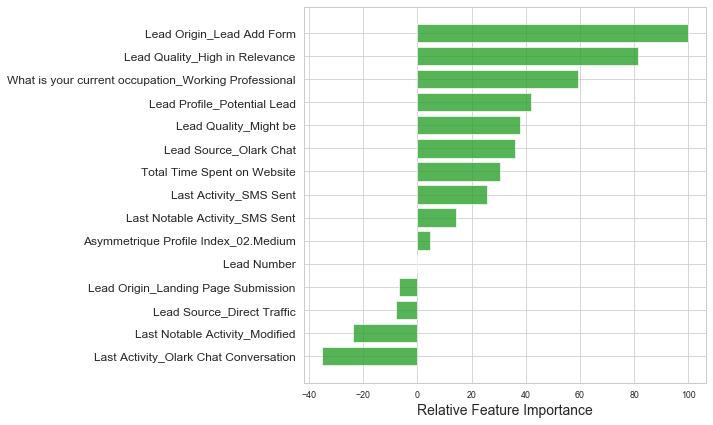

In [895]:
pos = np.arange(sorted_index.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_index], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_index], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()


##  Top 3 features which contributed most for the probability of a lead getting converted

In [896]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Lead Origin_Lead Add Form,100.00
10,Lead Quality_High in Relevance,81.30
14,What is your current occupation_Working Profes...,59.35


## Lead Score calculation


In [897]:

leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,7710,0.26,0
1,0,7124,0.01,0
2,0,6405,0.02,0
3,1,356,0.53,1
4,0,9081,0.03,0


In [898]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.29,4323,0,1,1,1,0,0,0,0,0,0,0,0
1,1,1.00,5795,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.30,434,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.61,8957,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.02,4260,0,1,0,0,0,0,0,0,0,0,0,0


In [899]:

# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4323,0,0.29,0
1,5795,1,1.00,1
2,434,0,0.30,0
3,8957,0,0.61,1
4,4260,0,0.02,0


In [900]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Conversion_Prob,Converted,LeadID,final_predicted
0,0.29,0,4323,0
1,1.00,1,5795,1
2,0.30,0,434,0
3,0.61,0,8957,1
4,0.02,0,4260,0


In [901]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8474

In [902]:
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Conversion_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.29,0,4323,0,29
1,1.00,1,5795,1,100
2,0.30,0,434,0,30
3,0.61,0,8957,1,61
4,0.02,0,4260,0,2


In [903]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [907]:
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Conversion_Prob,Converted,final_predicted,Lead_Score
LeadID,,,,
0,0.17,0,0,17
1,0.33,0,1,33
2,0.96,1,1,96
3,0.05,0,0,5
4,0.72,1,1,72


In [908]:
ol = leads.copy()
print(ol.shape)
print(leads.shape)

(8474, 102)
(8474, 102)


In [909]:
ol = ol[['Lead Number']]
ol.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [910]:

# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([ol, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Conversion_Prob,Converted,final_predicted,Lead_Score
0,660737,0.17,0,0,17
1,660728,0.33,0,1,33
2,660727,0.96,1,1,96
3,660719,0.05,0,0,5
4,660681,0.72,1,1,72
5,660680,0.05,0,0,5
6,660673,0.82,1,1,82
7,660664,0.05,0,0,5
8,660624,0.08,0,0,8
9,660616,0.13,0,0,13


In [911]:
leads_with_score.shape

(8474, 5)